In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nfdrs4_moisture import compute_nfdrs4
from NG_FWI import hFWI
from model_base import DeadFuelMoistureModel
from model_comparison import fetch_meteo_data, prepare_lagged_features_dead, predict_dfmc_fireinsite, compute_simple_nelson, compute_fwi_system

In [2]:
lat = 35.27618889
lon = -112.0632472
start_date = "2018-05-23"
end_date = "2018-06-03"
dfr = fetch_meteo_data(lat, lon, start_date, end_date)
ffeats = prepare_lagged_features_dead(dfr.copy())
ffeats = predict_dfmc_fireinsite(ffeats)
dfr['simple_fmc'] = compute_simple_nelson(dfr)
nfd = compute_nfdrs4(dfr)
#dfr.merge

{'latitude': 35.27618889, 'longitude': -112.0632472, 'start_date': '2018-05-23', 'end_date': '2018-06-03', 'hourly': ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m', 'vapour_pressure_deficit', 'shortwave_radiation', 'global_tilted_irradiance'], 'tilt': 0.0, 'azimuth': 0.0}


In [2]:
def gen_data_for_site(lat, lon, start_date, end_date):
    dfr = fetch_meteo_data(lat, lon, start_date, end_date)
    ffeats = prepare_lagged_features_dead(dfr.copy())
    ffeats = predict_dfmc_fireinsite(ffeats)
    dfr['simple_fmc'] = compute_simple_nelson(dfr)
    nfd = compute_nfdrs4(dfr)
    nfd_fmc_cols = [x for x in nfd.columns if x.startswith("dmc_")]
    nfd_fmc_cols += ['lmc_herb', 'lmc_woody']
    nfd.loc[:, nfd_fmc_cols] *=100
    nfd_fmc_cols += ['date']
    fuel_columns = [x for x in ffeats.columns if x.startswith("dfmcfuel_")]
    fuel_columns+=['date']
    fwi_h = compute_fwi_system(dfr, lon, lat)
    res = dfr.merge(ffeats[fuel_columns], on='date', how='left')
    res = res.merge(nfd[nfd_fmc_cols], on='date', how='left')
    res = res.merge(fwi_h, on='date', how='left')
    return res

In [2]:
lat = 35.27618889
lon = -112.0632472
start_date = "2018-05-23"
end_date = "2018-06-03"
dfr = fetch_meteo_data(lat, lon, start_date, end_date)
ffeats = prepare_lagged_features_dead(dfr.copy())
ffeats = predict_dfmc_fireinsite(ffeats)
dfr['simple_fmc'] = compute_simple_nelson(dfr)
nfd = compute_nfdrs4(dfr)
nfd_fmc_cols = [x for x in nfd.columns if x.startswith("dmc_")]
nfd_fmc_cols += ['lmc_herb', 'lmc_woody']
nfd.loc[:, nfd_fmc_cols] *=100
nfd_fmc_cols += ['date']
fuel_columns = [x for x in ffeats.columns if x.startswith("dfmcfuel_")]
fuel_columns+=['date']
fwi_h = compute_fwi_system(dfr, lon, lat)

{'latitude': 35.27618889, 'longitude': -112.0632472, 'start_date': '2018-05-23', 'end_date': '2018-06-03', 'hourly': ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m', 'vapour_pressure_deficit', 'shortwave_radiation', 'global_tilted_irradiance'], 'tilt': 0.0, 'azimuth': 0.0}

########
Startup values used:
FFMC = 85.0 or mcffmc = None %
DMC = 6.0 and DC = 15.0
mcgfmc matted = 16.3075 % and standing = 16.3075 %
cumulative precipitation = 0.0 mm and canopy drying = 0 

Running 1 for 2018
########



In [3]:
fwi_h.columns

Index(['lat', 'long', 'timezone', 'temp', 'rh', 'ws', 'prec',
       'grass_fuel_load', 'date', 'percent_cured', 'solrad', 'sunrise',
       'sunset', 'sunlight_hours', 'mcffmc', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'dsr', 'mcgfmc_matted', 'mcgfmc_standing', 'gfmc', 'gsi', 'gfwi',
       'prec_cumulative', 'canopy_drying'],
      dtype='str')

In [64]:
nfd_fmc_cols = [x for x in nfd.columns if x.startswith("dmc_")]
print(nfd_fmc_cols)
nfd_fmc_cols += ['lmc_herb', 'lmc_woody']
nfd.loc[:, nfd_fmc_cols] *=100
nfd_fmc_cols += ['date']
nfd[nfd_fmc_cols]

['dmc_1_hr', 'dmc_10_hr', 'dmc_100_hr', 'dmc_1000_hr']


,dmc_1_hr,dmc_10_hr,dmc_100_hr,dmc_1000_hr,lmc_herb,lmc_woody,date
0,14.743609,19.432929,19.999327,19.999998,30.0,60.0,2018-05-23 00:00:00+00:00
1,11.239701,18.032482,19.984159,19.999912,30.0,60.0,2018-05-23 01:00:00+00:00
2,9.438655,16.947991,19.942610,19.999468,30.0,60.0,2018-05-23 02:00:00+00:00
3,8.608097,16.183887,19.895047,19.998588,30.0,60.0,2018-05-23 03:00:00+00:00
4,8.501569,15.647742,19.852647,19.997486,30.0,60.0,2018-05-23 04:00:00+00:00
...,...,...,...,...,...,...,...
283,3.834396,6.129158,8.935985,13.242099,30.0,60.0,2018-06-03 19:00:00+00:00
284,3.312734,6.019747,8.896750,13.201379,30.0,60.0,2018-06-03 20:00:00+00:00
285,2.908448,5.873117,8.853233,13.155202,30.0,60.0,2018-06-03 21:00:00+00:00
286,2.606537,5.733043,8.808722,13.107588,30.0,60.0,2018-06-03 22:00:00+00:00


In [65]:
fuel_columns = [x for x in ffeats.columns if x.startswith("dfmcfuel_")]
fuel_columns+=['date']
fuel_columns

['dfmcfuel_Bracken leaves',
 'dfmcfuel_Bracken stem',
 'dfmcfuel_Gorse canopy',
 'dfmcfuel_Gorse stem',
 'dfmcfuel_Heather canopy',
 'dfmcfuel_Heather stem',
 'dfmcfuel_Moor grass',
 'dfmcfuel_Surface',
 'date']

In [66]:
res.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'precipitation',
       'cloud_cover_x', 'wind_speed_10m', 'vapour_pressure_deficit_x',
       'shortwave_radiation_x', 'global_tilted_irradiance_x', 'utc_offset_x',
       'simple_fmc_x', 'Temperature(F)', 'RelativeHumidity(%)',
       'Precipitation(in)', 'SolarRadiation(W/m2)', 'WindSpeed(mph)',
       'SnowFlag', 'DateTime', 'dfmcfuel_Bracken leaves',
       'dfmcfuel_Bracken stem', 'dfmcfuel_Gorse canopy', 'dfmcfuel_Gorse stem',
       'dfmcfuel_Heather canopy', 'dfmcfuel_Heather stem',
       'dfmcfuel_Moor grass', 'dfmcfuel_Surface', 'dmc_1_hr_x', 'dmc_10_hr_x',
       'dmc_100_hr_x', 'dmc_1000_hr_x', 'lmc_herb_x', 'lmc_woody_x', 'temp',
       'rh', 'prec', 'cloud_cover_y', 'ws', 'vapour_pressure_deficit_y',
       'shortwave_radiation_y', 'global_tilted_irradiance_y', 'utc_offset_y',
       'simple_fmc_y', 'temperature(f)', 'relativehumidity(%)',
       'precipitation(in)', 'solarradiation(w/m2)', 'windspeed(mph)',
     

In [54]:
res = dfr.merge(ffeats[fuel_columns], on='date', how='left')

In [55]:
res = res.merge(nfd[nfd_fmc_cols], on='date', how='left')

In [67]:
res

,date,temperature_2m,relative_humidity_2m,precipitation,cloud_cover_x,wind_speed_10m,vapour_pressure_deficit_x,shortwave_radiation_x,global_tilted_irradiance_x,utc_offset_x,...,bui,fwi,dsr,mcgfmc_matted,mcgfmc_standing,gfmc,gsi,gfwi,prec_cumulative,canopy_drying
0,2018-05-23 00:00:00+00:00,17.900000,14.345733,0.0,6.0,17.414476,1.758465,531.0,531.000000,0,...,6.3286,6.3590,0.7187,9.0288,10.9274,82.6309,36.0463,19.9093,0.0,0.0
1,2018-05-23 01:00:00+00:00,17.000000,16.421734,0.0,4.0,17.731598,1.621170,322.0,322.000061,0,...,6.6346,8.2392,1.1368,8.4209,9.8947,82.7862,39.1922,20.5069,0.0,0.0
2,2018-05-23 02:00:00+00:00,15.200000,20.139668,0.0,11.0,13.910169,1.381149,132.0,132.000000,0,...,6.8975,7.8173,1.0358,8.7187,9.8947,83.5642,29.5849,18.4983,0.0,0.0
3,2018-05-23 03:00:00+00:00,11.900000,26.447285,0.0,17.0,9.983106,1.026370,9.0,8.999999,0,...,6.8975,6.5783,0.7632,9.8820,10.5836,83.8183,17.9534,14.9305,0.0,0.0
4,2018-05-23 04:00:00+00:00,10.450000,30.717550,0.0,0.0,6.569383,0.878218,0.0,0.000000,0,...,6.8975,5.6295,0.5793,10.9618,11.3960,83.8110,8.8519,9.8795,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2018-06-03 19:00:00+00:00,27.200001,7.269780,0.0,0.0,11.966953,3.346708,1021.0,1021.000000,0,...,65.6830,41.2520,19.6746,2.3172,4.7212,76.9955,26.4866,17.7081,0.0,0.0
284,2018-06-03 20:00:00+00:00,27.900000,6.840337,0.0,0.0,12.574260,3.502472,1048.0,1048.000000,0,...,66.2559,43.7760,21.8553,2.2137,4.4129,76.8132,28.2915,18.1790,0.0,0.0
285,2018-06-03 21:00:00+00:00,28.250000,6.362380,0.0,0.0,13.684735,3.592830,1012.0,1012.000000,0,...,66.8388,46.8389,24.6344,2.2137,4.1804,76.4492,31.0000,18.8320,0.0,0.0
286,2018-06-03 22:00:00+00:00,28.350000,5.882886,0.0,0.0,14.241630,3.632243,917.0,917.000000,0,...,67.4268,48.9320,26.6164,2.2137,3.9906,76.2659,32.3375,19.1337,0.0,0.0


In [69]:
dfr.utc_offset

0      0
1      0
2      0
3      0
4      0
      ..
283    0
284    0
285    0
286    0
287    0
Name: utc_offset, Length: 288, dtype: int64

In [57]:
dfwi = res.copy()
fwi_columns = ['id', 'lat', 'long', 'timezone', 'yr', ]
dfwi =dfwi.rename({'temperature_2m': 'temp', 'relative_humidity_2m': 'rh', 'wind_speed_10m': 'ws', 'precipitation': 'prec'}, axis=1)
dfwi['yr'] = dfwi.date.dt.year
dfwi['mon'] = dfwi.date.dt.month
dfwi['day'] = dfwi.date.dt.day
dfwi['hr'] = dfwi.date.dt.hour
dfwi['grass_fuel_load'] = 0.1
dfwi['id'] = 1
dfwi['long'] = lon
dfwi['lat'] = lat
dfwi['timezone'] = 0.0


In [58]:
res_fwi = hFWI(dfwi.drop('date', axis=1))
res_fwi['date'] = dfwi['date']


########
Startup values used:
FFMC = 85.0 or mcffmc = None %
DMC = 6.0 and DC = 15.0
mcgfmc matted = 16.3075 % and standing = 16.3075 %
cumulative precipitation = 0.0 mm and canopy drying = 0 

Running 1 for 2018
########



In [59]:
res.date

0     2018-05-23 00:00:00+00:00
1     2018-05-23 01:00:00+00:00
2     2018-05-23 02:00:00+00:00
3     2018-05-23 03:00:00+00:00
4     2018-05-23 04:00:00+00:00
                 ...           
283   2018-06-03 19:00:00+00:00
284   2018-06-03 20:00:00+00:00
285   2018-06-03 21:00:00+00:00
286   2018-06-03 22:00:00+00:00
287   2018-06-03 23:00:00+00:00
Name: date, Length: 288, dtype: datetime64[s, UTC]

In [60]:
res = res.merge(res_fwi, on='date', how='left')

In [61]:
sns.lineplot(data=res, x='date', y='dmc_1_hr')
sns.lineplot(data=res, x='date', y='dmc_10_hr')
sns.lineplot(data=res, x='date', y='dfmcfuel_Bracken leaves')
#sns.lineplot(data=res, x='date', y='dfmcfuel_Heather stem')
sns.lineplot(data=res, x='date', y='mcffmc')
#sns.lineplot(data=res, x='date', y='vapour_pressure_deficit')

ValueError: Could not interpret value `dmc_1_hr` for `y`. An entry with this name does not appear in `data`.

In [62]:
res.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'precipitation',
       'cloud_cover_x', 'wind_speed_10m', 'vapour_pressure_deficit_x',
       'shortwave_radiation_x', 'global_tilted_irradiance_x', 'utc_offset_x',
       'simple_fmc_x', 'Temperature(F)', 'RelativeHumidity(%)',
       'Precipitation(in)', 'SolarRadiation(W/m2)', 'WindSpeed(mph)',
       'SnowFlag', 'DateTime', 'dfmcfuel_Bracken leaves',
       'dfmcfuel_Bracken stem', 'dfmcfuel_Gorse canopy', 'dfmcfuel_Gorse stem',
       'dfmcfuel_Heather canopy', 'dfmcfuel_Heather stem',
       'dfmcfuel_Moor grass', 'dfmcfuel_Surface', 'dmc_1_hr_x', 'dmc_10_hr_x',
       'dmc_100_hr_x', 'dmc_1000_hr_x', 'lmc_herb_x', 'lmc_woody_x', 'temp',
       'rh', 'prec', 'cloud_cover_y', 'ws', 'vapour_pressure_deficit_y',
       'shortwave_radiation_y', 'global_tilted_irradiance_y', 'utc_offset_y',
       'simple_fmc_y', 'temperature(f)', 'relativehumidity(%)',
       'precipitation(in)', 'solarradiation(w/m2)', 'windspeed(mph)',
     

In [3]:
model = DeadFuelMoistureModel(pickled_model_fname="model_onehot_dead.onnx")
dfr = model.prepare_training_dataset(
    fname="data/training_dataset_features_full.parquet"
)

In [5]:
site = "Cobham Common H15"
dfs = dfr[dfr.site==site].copy()
lon = dfs.longitude.iloc[0]
lat = dfs.latitude.iloc[0]
start_date = dfs.date.min().strftime("%Y-%m-%d")
end_date = dfs.date.max().strftime("%Y-%m-%d")

In [7]:
ress = gen_data_for_site(lat, lon, start_date, end_date)

{'latitude': np.float64(51.374153), 'longitude': np.float64(-0.59932), 'start_date': '2021-02-24', 'end_date': '2023-02-19', 'hourly': ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m', 'vapour_pressure_deficit', 'shortwave_radiation', 'global_tilted_irradiance'], 'tilt': 4.847192439431614, 'azimuth': 148.39249775375112}

########
Startup values used:
FFMC = 85.0 or mcffmc = None %
DMC = 6.0 and DC = 15.0
mcgfmc matted = 16.3075 % and standing = 16.3075 %
cumulative precipitation = 0.0 mm and canopy drying = 0 

Running 1 for 2021
Running 1 for 2022
Running 1 for 2023
########



(-2.0, 40.0)

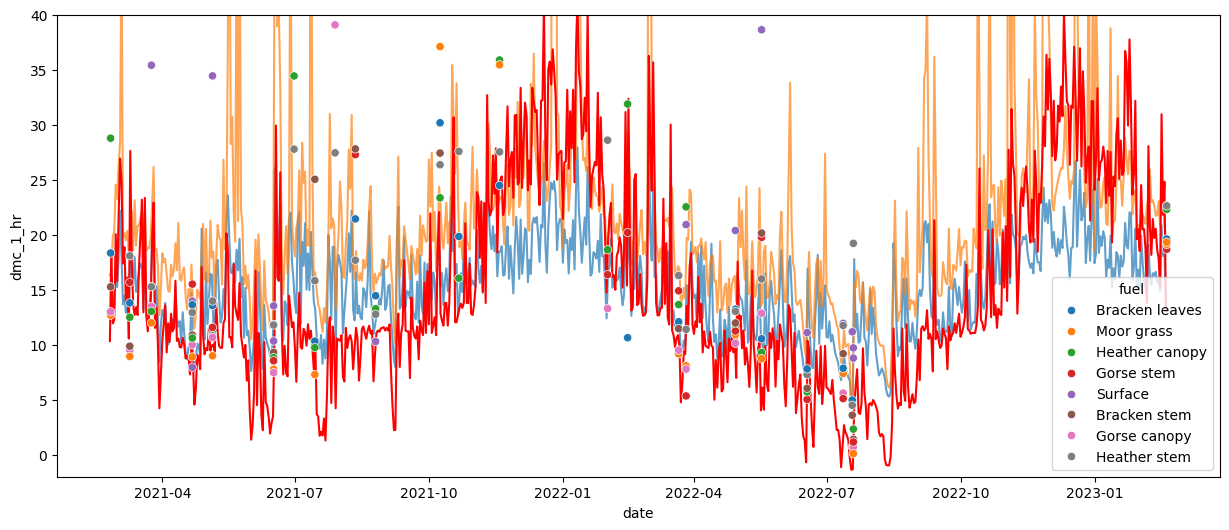

In [18]:
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111)
    ressd = ress.groupby(ress.date.dt.date)[['dmc_1_hr', 'dmc_10_hr', 'dfmcfuel_Bracken leaves', 'dfmcfuel_Heather canopy', 'simple_fmc', 'mcffmc', 'mcgfmc_matted']].min()
    sns.lineplot(data=ressd, x='date', y='dmc_1_hr', alpha=0.7, ax=ax)
    sns.lineplot(data=ressd, x='date', y='mcffmc',alpha=0.7, ax=ax)
    #sns.lineplot(data=ressd, x='date', y='mcgfmc_matted',alpha=0.7, ax=ax)
    sns.lineplot(data=ressd, x='date', y='dfmcfuel_Heather canopy',alpha=1, color='red',ax=ax)
    #sns.lineplot(data=ressd, x='date', y='dfmcfuel_Heather stem',ax=ax)
    #sns.lineplot(data=ressd, x='date', y='simple_fmc', alpha=0.5, color='red',ax=ax)
    sns.scatterplot(data=dfs, x=dfs.date, y="fmc_%", hue="fuel", zorder=100)
    #ax.get_legend().remove()
    ax.set_ylim(-2, 40)

    #ax.set_xlim(pd.Timestamp('2022-06-01 00:00:00'), pd.Timestamp('2022-08-17 00:00:00'))

(np.float64(19190.0), np.float64(19193.0))

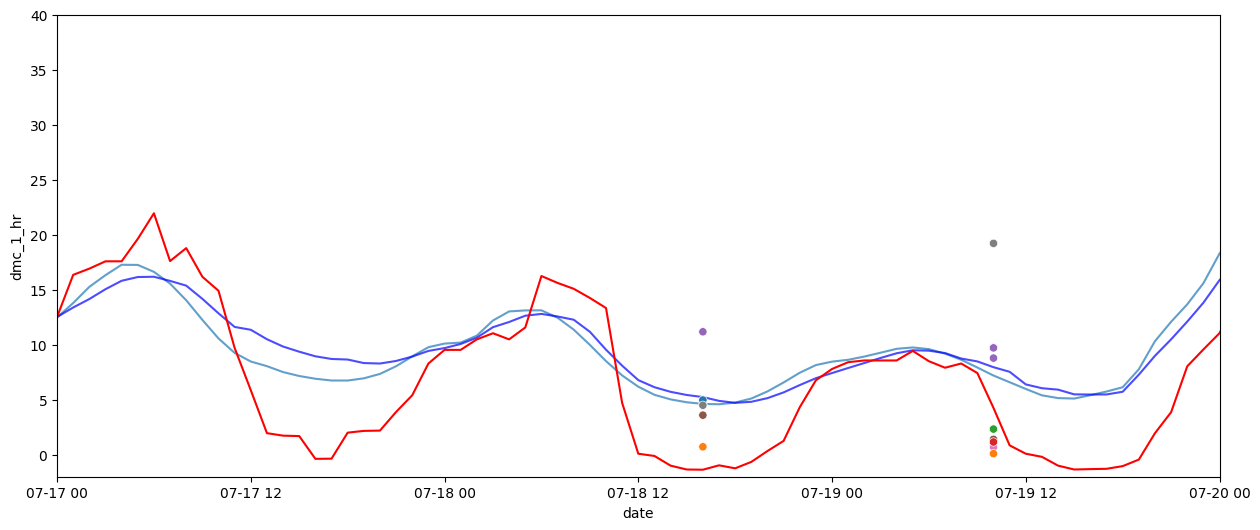

In [16]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
#ressd = ress.groupby(ress.date.dt.date)[['dmc_1_hr', 'dmc_10_hr', 'dfmcfuel_Bracken leaves', 'dfmcfuel_Heather canopy', 'simple_fmc', 'mcffmc', 'mcgfmc_matted']].min()
sns.lineplot(data=ress, x='date', y='dmc_1_hr', alpha=0.7, ax=ax)
sns.lineplot(data=ress, x='date', y='mcffmc',alpha=0.7, ax=ax, color='blue')
#sns.lineplot(data=ressd, x='date', y='mcgfmc_matted',alpha=0.7, ax=ax)
sns.lineplot(data=ress, x='date', y='dfmcfuel_Heather canopy',alpha=1, color='red',ax=ax)
#sns.lineplot(data=ressd, x='date', y='dfmcfuel_Heather stem',ax=ax)
#sns.lineplot(data=ressd, x='date', y='simple_fmc', alpha=0.5, color='red',ax=ax)
sns.scatterplot(data=dfs, x=dfs.date, y="fmc_%", hue="fuel", zorder=100)
ax.get_legend().remove()
ax.set_ylim(-2, 40)

ax.set_xlim(pd.Timestamp('2022-07-17 00:00:00'), pd.Timestamp('2022-07-20 00:00:00'))

In [39]:
ressd = ress.groupby(ress.date.dt.date)[['dmc_1_hr', 'dmc_10_hr', 'dfmcfuel_Bracken leaves', 'simple_fmc']].min()

In [15]:
ress.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'precipitation',
       'cloud_cover', 'wind_speed_10m', 'vapour_pressure_deficit',
       'shortwave_radiation', 'global_tilted_irradiance', 'utc_offset',
       'simple_fmc', 'Temperature(F)', 'RelativeHumidity(%)',
       'Precipitation(in)', 'SolarRadiation(W/m2)', 'WindSpeed(mph)',
       'SnowFlag', 'DateTime', 'dfmcfuel_Bracken leaves',
       'dfmcfuel_Bracken stem', 'dfmcfuel_Gorse canopy', 'dfmcfuel_Gorse stem',
       'dfmcfuel_Heather canopy', 'dfmcfuel_Heather stem',
       'dfmcfuel_Moor grass', 'dfmcfuel_Surface', 'dmc_1_hr', 'dmc_10_hr',
       'dmc_100_hr', 'dmc_1000_hr', 'lmc_herb', 'lmc_woody', 'lat', 'long',
       'timezone', 'temp', 'rh', 'ws', 'prec', 'grass_fuel_load',
       'percent_cured', 'solrad', 'sunrise', 'sunset', 'sunlight_hours',
       'mcffmc', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'dsr',
       'mcgfmc_matted', 'mcgfmc_standing', 'gfmc', 'gsi', 'gfwi',
       'prec_cumulative', 'canopy_dr

<Axes: >

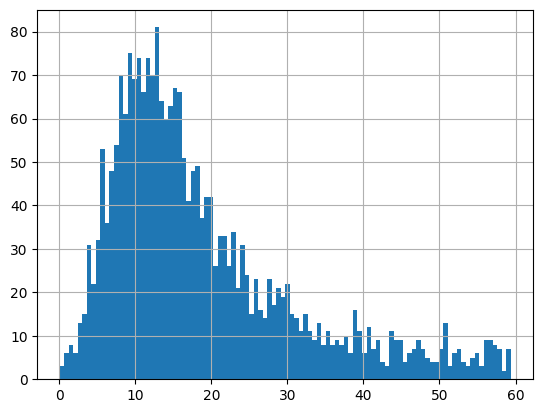

In [14]:
dfr['fmc_%'].hist(bins=100)

In [82]:
ress.groupby(ress.date.dt.date)['vapour_pressure_deficit'].max().nlargest(10)

date
2022-07-19    4.690043
2022-07-18    4.374482
2022-08-13    3.811979
2022-08-12    3.668088
2022-08-14    3.461979
2022-08-11    3.428323
2022-07-11    2.886275
2022-08-10    2.727462
2022-07-12    2.716344
2022-06-17    2.704217
Name: vapour_pressure_deficit, dtype: float32

In [84]:
dfr[dfr['fmc_%']<2]

,date,site,longitude,latitude,climate_region_of_uk,lcm_land_cover,elevation,slope,aspect,soil_type,...,fuel,fmc_cat,fuel_Bracken leaves,fuel_Bracken stem,fuel_Gorse canopy,fuel_Gorse stem,fuel_Heather canopy,fuel_Heather stem,fuel_Moor grass,fuel_Surface
1316,2021-10-08 13:00:00+00:00,Ockham Common F15,-0.452030,51.317308,South East,Coniferous Forest,37,1.129449,325.740037,15,...,Bracken leaves,dead,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3288,2022-08-09 10:00:00+00:00,Stanta AG10,0.760530,52.490625,East Anglia,Acid Grassland,39,0.656104,84.166693,10,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3469,2022-07-18 13:00:00+00:00,Stanta H3,0.755390,52.540589,East Anglia,Heathland,41,1.219763,169.714813,3,...,Gorse stem,dead,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3477,2022-07-18 13:00:00+00:00,Stanta H3,0.755390,52.540589,East Anglia,Heathland,41,1.219763,169.714813,3,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4039,2022-07-19 15:00:00+00:00,Matlock Moor F14,-1.923267,53.165069,Peak District,Coniferous Forest,371,6.437168,342.595688,14,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4184,2022-08-10 14:00:00+00:00,Ockham Common H15,-0.445240,51.315689,South East,Heathland,44,0.875319,294.770369,15,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4549,2022-07-18 16:00:00+00:00,Cobham Common H15,-0.599320,51.374153,South East,Heathland,55,1.639942,144.394817,15,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4559,2022-07-19 10:00:00+00:00,Cobham Common H15,-0.599320,51.374153,South East,Heathland,55,1.639942,144.394817,15,...,Gorse canopy,dead,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4567,2022-07-19 10:00:00+00:00,Cobham Common H15,-0.599320,51.374153,South East,Heathland,55,1.639942,144.394817,15,...,Bracken stem,dead,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4568,2022-07-19 10:00:00+00:00,Cobham Common H15,-0.599320,51.374153,South East,Heathland,55,1.639942,144.394817,15,...,Gorse stem,dead,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
